In [2]:
import numpy as np
import pandas as pd


1) load the data set

2) pre processing
     a)  match data types
     b)  impute/drop the null values
     c)  find outliers & impute/delete
     d)  convert the string values - categorical
     e)  class balancing   - except 
     f)  data normalization  - scaling
     g)  data joins - if required
     h)  data reduction (PCA) - except
     i)  derive new field - if required


In [5]:
df = pd.DataFrame({"name": ["abhi", "ankit", "ashish", "chand", "priya"],
                   "vals" : [10, 50, 30, 40 , "a35"] })
                   
df                   

,name,vals
0,abhi,10
1,ankit,50
2,ashish,30
3,chand,40
4,priya,a35


In [11]:
# match the DATA TYPE as per  the DATA Dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
name    5 non-null object
vals    5 non-null int32
dtypes: int32(1), object(1)
memory usage: 140.0+ bytes


In [13]:
# replaced & Convert from object type to integer type
df["vals"] = df["vals"].replace("a35", "35")
df["vals"] = df["vals"].astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
name    5 non-null object
vals    5 non-null int32
dtypes: int32(1), object(1)
memory usage: 140.0+ bytes


In [25]:
#DETECT  THE NULL VALUES
df = pd.DataFrame({"name": ["abhi", "ankit", "ashish", "chand", "priya"],
                   "vals" : [np.nan, 50, 30, 40 , np.nan] })
                   
df                   

,name,vals
0,abhi,NaN
1,ankit,50.0
2,ashish,30.0
3,chand,40.0
4,priya,NaN


In [28]:
# how to display the NULL VALUES
df.isnull().sum()

# checking for % of NULL Values
round(100*(df.isnull().sum()/len(df.index)),2)


# if the null values are greater than 80%  - better DROP 
# if the NULL Values are < 80 %            - better IMPUTE

name     0.0
vals    40.0
dtype: float64

In [18]:
# deep copy of the ORG DATA SET
drop_df = df.copy()
impute_df = df.copy()
print(drop_df)
print(impute_df)

     name  vals
0    abhi   NaN
1   ankit  50.0
2  ashish  30.0
3   chand  40.0
4   priya   NaN
     name  vals
0    abhi   NaN
1   ankit  50.0
2  ashish  30.0
3   chand  40.0
4   priya   NaN


In [20]:
# DELETE all the NULL values 
drop_df.dropna(inplace=True)
drop_df

,name,vals
1,ankit,50.0
2,ashish,30.0
3,chand,40.0


In [27]:
# IMPUTE THE MISSING VALUE OF - MEAN
res =impute_df["vals"].mean()
print("MEAN = ",res)

impute_df["vals"] = impute_df["vals"].fillna(res)
print(impute_df)

MEAN =  40.0
     name  vals
0    abhi  40.0
1   ankit  50.0
2  ashish  30.0
3   chand  40.0
4   priya  40.0


In [29]:
######################### program##############
import numpy as np

numlst = [100,100,200,300,300,400,500,550,600,650,700,710,725,740,750,770,775,790,800,810,850,900,2500,2550,2600]

#step1
numlst.sort()

#step2 
q1, q3= np.percentile(numlst,[25,75])

#step3 
IQR = q3 - q1

#step4
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)

print("Q1 = ",q1)
print("Q3 = ",q3)
print("Median = ",np.median(numlst))

print("LOWER BOUND = ",lower_bound)
print("UPPER BOUND = ",upper_bound)

data_clean = [elem for elem in numlst if elem>=lower_bound and elem<=upper_bound] 
data_outlier = [elem for elem in numlst if elem<lower_bound or elem>upper_bound] 

print("OutLier =",data_outlier)



Q1 =  500.0
Q3 =  800.0
Median =  725.0
LOWER BOUND =  50.0
UPPER BOUND =  1250.0
OutLier = [2500, 2550, 2600]


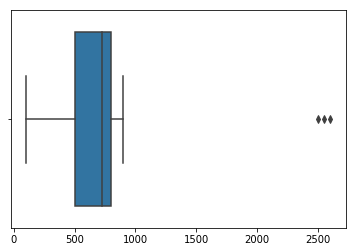

In [32]:
import seaborn as sns
%matplotlib inline
sns.boxplot(numlst)

In [45]:
# drop the OUTLIER 
new_df = pd.DataFrame({"nums": numlst})
res=  new_df[~((new_df["nums"]<lower_bound) | (new_df["nums"]>upper_bound))]
print(res)



    nums
0    100
1    100
2    200
3    300
4    300
5    400
6    500
7    550
8    600
9    650
10   700
11   710
12   725
13   740
14   750
15   770
16   775
17   790
18   800
19   810
20   850
21   900


In [47]:
# imput the OUTLIER
new_df = pd.DataFrame({"nums": numlst})
#print(new_df)

median = np.median(new_df["nums"])

print(median)

new_df.loc[(new_df["nums"]<lower_bound) | (new_df["nums"]>upper_bound), ["nums"]] = median

new_df


725.0


,nums
0,100.0
1,100.0
2,200.0
3,300.0
4,300.0
5,400.0
6,500.0
7,550.0
8,600.0
9,650.0


In [51]:
# CONVERT THE CATEGORICAL VALUES into integer

df1 = pd.DataFrame({"name" : ["dvd","prn","hdd","keb","cpu","mon"],
                    "ctgry": ["stor","io","stor","io","proc","io"],
                    "price": [200,8000, 12000, 1000, 15000, 10000]
                   })
df1

df2 = df1.copy()


In [52]:
# using map - assign a value
df2["ctgry"] = df2["ctgry"].map({"stor":1, "io":2, "proc":3 })
df2

,name,ctgry,price
0,dvd,1,200
1,prn,2,8000
2,hdd,1,12000
3,keb,2,1000
4,cpu,3,15000
5,mon,2,10000


In [54]:
# using apply function
df3 = df1.copy()

def encode(row):
    adict = {"stor":1, "io":2, "proc":3 }
    return adict[row]

df3["ctgry"] = df3["ctgry"].apply(encode)

df3


,name,ctgry,price
0,dvd,1,200
1,prn,2,8000
2,hdd,1,12000
3,keb,2,1000
4,cpu,3,15000
5,mon,2,10000


In [61]:
df4 = df1.copy()
res = pd.get_dummies(df4["ctgry"])
another  = pd.concat([df4,res], axis=1)
another.drop(["ctgry"],axis=1 ,inplace=True)
another

,name,price,io,proc,stor
0,dvd,200,0,0,1
1,prn,8000,1,0,0
2,hdd,12000,0,0,1
3,keb,1000,1,0,0
4,cpu,15000,0,1,0
5,mon,10000,1,0,0


In [62]:
# SCaling the data - DATA NORMALIZATION
# standard scaling
# minmax scaling
# Z-score scaling

#Normalize the data

# Scaling the data numerical data except dummy & Binary data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col_list = []

df_train[col_list] = scaler.fit_transform(df_train[col_list])
df_train.head()



NameError: name 'df_train' is not defined

In [63]:
# derive new feature 
import pandas as pd
from datetime import date


a = [date(2010,1,1), date(2020,10,1), date(2019,5,10), date(2018,5,20)]



df = pd.DataFrame({"name" : ["a","b","c","d"] ,
                   "loc"  : ["blr","chn","hyd","blr"],
                   "doj"  : a
                  })



df["doj"] = df["doj"].astype("datetime64")

df


,name,loc,doj
0,a,blr,2010-01-01
1,b,chn,2020-10-01
2,c,hyd,2019-05-10
3,d,blr,2018-05-20


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
name    4 non-null object
loc     4 non-null object
doj     4 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 176.0+ bytes


In [66]:
import datetime
df["exp"] = pd.to_datetime(datetime.date.today()) - df["doj"]
df

,name,loc,doj,exp
0,a,blr,2010-01-01,4500 days
1,b,chn,2020-10-01,574 days
2,c,hyd,2019-05-10,1084 days
3,d,blr,2018-05-20,1439 days


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
name    4 non-null object
loc     4 non-null object
doj     4 non-null datetime64[ns]
exp     4 non-null timedelta64[ns]
dtypes: datetime64[ns](1), object(2), timedelta64[ns](1)
memory usage: 208.0+ bytes
